In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

In [2]:
## Plotting — in GG style
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
listings_file = 'http://data.insideairbnb.com/germany/be/berlin/2019-07-11/data/listings.csv.gz'
df = pd.read_csv(listings_file, compression='gzip')
df.to_csv('data.csv')

# Local proxy for data - why? how?
# df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24395 entries, 0 to 24394
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 19.7+ MB


In [5]:
# pd.options.display.max_rows = 4000
pd.Series(df.columns)

0                                                id
1                                       listing_url
2                                         scrape_id
3                                      last_scraped
4                                              name
                           ...                     
101                  calculated_host_listings_count
102     calculated_host_listings_count_entire_homes
103    calculated_host_listings_count_private_rooms
104     calculated_host_listings_count_shared_rooms
105                               reviews_per_month
Length: 106, dtype: object

In [6]:
# Getting a slice of data for developing a cleansing and prediction (wrangling, munging) procedure
df = df[['host_response_time','host_response_rate','review_scores_rating']]
df.head()

,host_response_time,host_response_rate,review_scores_rating
0,a few days or more,40%,82.0
1,within a few hours,88%,93.0
2,within an hour,100%,93.0
3,within an hour,100%,89.0
4,within a few hours,100%,99.0


In [7]:
# Exploring value base
df.host_response_time.unique()

array(['a few days or more', 'within a few hours', 'within an hour',
       'within a day', nan], dtype=object)

In [8]:
# Which of the columns are computable?
df.describe()

,review_scores_rating
count,19476.000000
mean,94.671544
std,7.503871
min,20.000000
25%,92.000000
50%,97.000000
75%,100.000000
max,100.000000


In [9]:
df.host_response_rate = df.host_response_rate.str.strip('%')
df.host_response_rate = pd.to_numeric(df.host_response_rate)
df.describe()

,host_response_rate,review_scores_rating
count,13868.000000,19476.000000
mean,91.898616,94.671544
std,18.903297,7.503871
min,0.000000,20.000000
25%,94.000000,92.000000
50%,100.000000,97.000000
75%,100.000000,100.000000
max,100.000000,100.000000


In [10]:
# print(df.head())
df.host_response_time.value_counts()

within an hour        7225
within a few hours    3145
within a day          2952
a few days or more     546
Name: host_response_time, dtype: int64

In [11]:
# How many values?
df.shape

(24395, 3)

In [12]:
# ... are null?
df.host_response_time.isna().sum()

10527

In [28]:
# pudotetaan arvot jonka arvo on alle 3 - pois
df = df.dropna()
df.shape

(12091, 3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52d61ab438>,
      dtype=object)

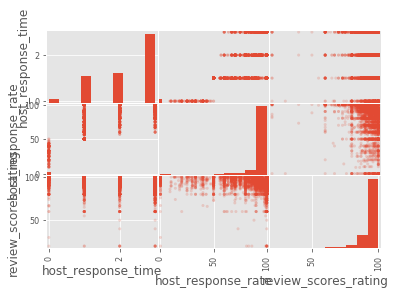

In [29]:
pd.plotting.scatter_matrix(df, alpha=0.2)

In [16]:
# Encoding label encoder...
le = preprocessing.LabelEncoder()

In [17]:
#cols = ['within an hour', 'within a day', 'a few days or more']
arr = le.fit_transform(df.host_response_time)
df.host_response_time = arr
df.head()

,host_response_time,host_response_rate,review_scores_rating
0,0,40.0,82.0
1,2,88.0,93.0
2,3,100.0,93.0
3,3,100.0,89.0
4,2,100.0,99.0


In [18]:
# ...OR alternative way 
df_label = df.apply(preprocessing.LabelEncoder().fit_transform)
df_label.host_response_time.head()

0    0
1    2
2    3
3    3
4    2
Name: host_response_time, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52d5c6e470>,
      dtype=object)

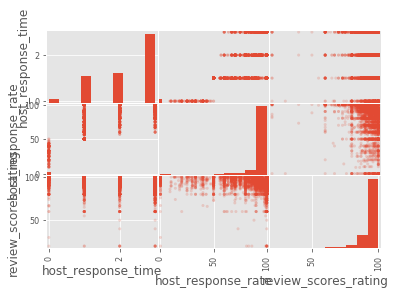

In [19]:
# Replotting
pd.plotting.scatter_matrix(df, alpha=0.2)

In [21]:
# Linear regression
lr = linear_model.LinearRegression()

In [22]:
y = df.review_scores_rating
X = df.drop(columns='review_scores_rating')
X.head()

,host_response_time,host_response_rate
0,0,40.0
1,2,88.0
2,3,100.0
3,3,100.0
4,2,100.0


In [23]:
predict = cross_val_predict(lr, X, y, cv=10)

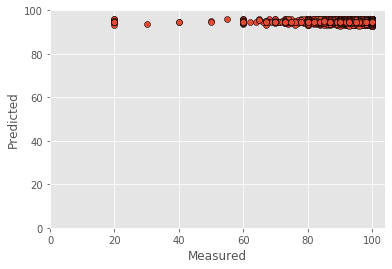

In [26]:
fig, ax = plt.subplots()

ax.scatter(y, predict, edgecolors=(0, 0, 0))

#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.xlim(0) 
plt.ylim(0,100) 
plt.show()

In [27]:
df.corr()

,host_response_time,host_response_rate,review_scores_rating
host_response_time,1.000000,0.597305,-0.025025
host_response_rate,0.597305,1.000000,0.039797
review_scores_rating,-0.025025,0.039797,1.000000
